# Loading the data

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pickle
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,f1_score
from sklearn.model_selection import KFold

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

def evaluate_model (y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    print("Accuracy of the model is: %.2f"%(accuracy * 100) , "%")
    print("Precision of the model is: %.2f" %(precision * 100) , "%")
    print("Recall of the model is: %.2f" %(recall * 100) , "%")
    print("AUC value of the model is: %.2f" %(roc * 100) , "%")
    print("F1 score of the model is: %.2f" %(f1 * 100) , "%")

In [158]:
df = pd.read_csv("Thyroid_Diff.csv")

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
df.shape

(383, 17)

In [5]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [6]:
df.dtypes

Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiothreapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [7]:
df['Hx Radiothreapy'].value_counts()

Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64

In [8]:
df.isnull().sum().sum()

0

In [9]:
df[df.duplicated()]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
32,36,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
38,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
40,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
66,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
69,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
77,29,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
120,37,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
121,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
123,28,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
132,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


In [10]:
df['Physical Examination'].value_counts() # one-hot encoding 

Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

In [11]:
df.groupby("Recurred")["Physical Examination"].value_counts()

Recurred  Physical Examination       
No        Single nodular goiter-right    112
          Multinodular goiter             88
          Single nodular goiter-left      63
          Diffuse goiter                   7
          Normal                           5
Yes       Multinodular goiter             52
          Single nodular goiter-right     28
          Single nodular goiter-left      26
          Normal                           2
Name: count, dtype: int64

<div style="text-align: center; font-size: 35px; font-weight: bold;">Exploratory Data Analysis(EDA)</div>


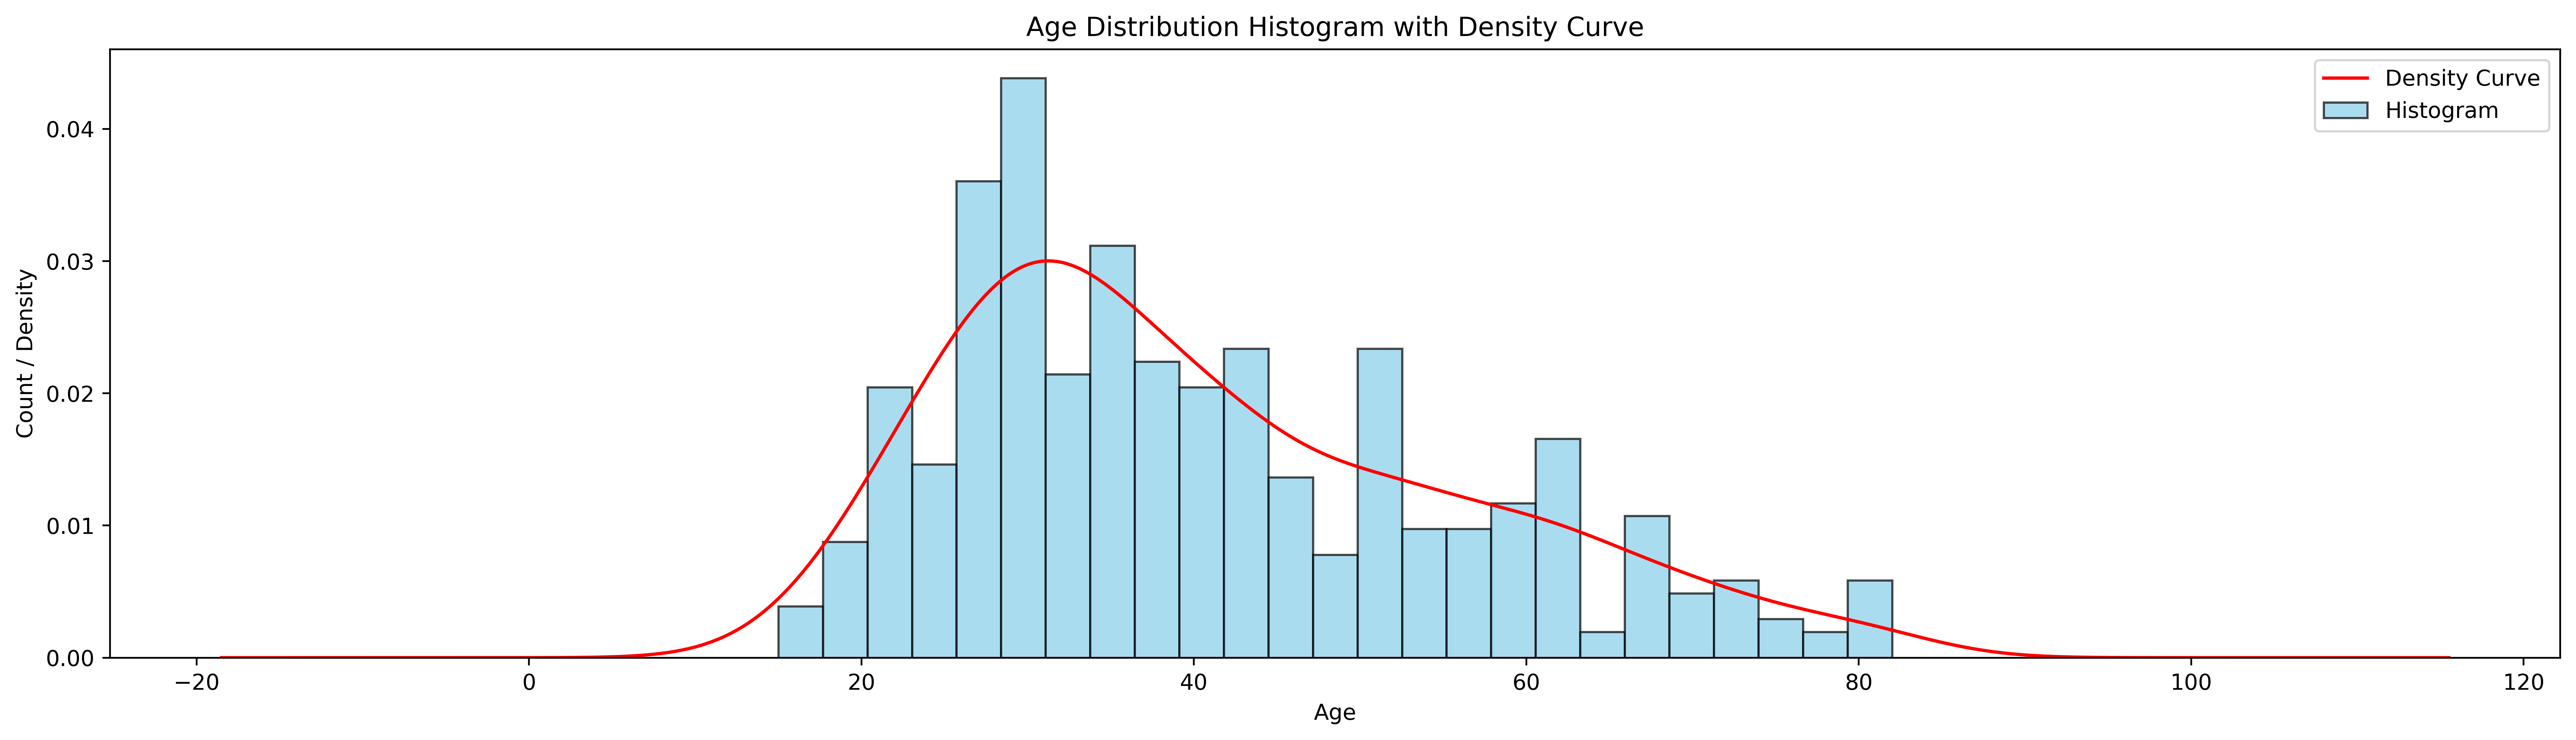

In [11]:
fig, ax = plt.subplots(figsize = (20, 5),dpi=500)

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)

df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

In [12]:
df['Stage'].value_counts().index

Index(['I', 'II', 'IVB', 'III', 'IVA'], dtype='object', name='Stage')

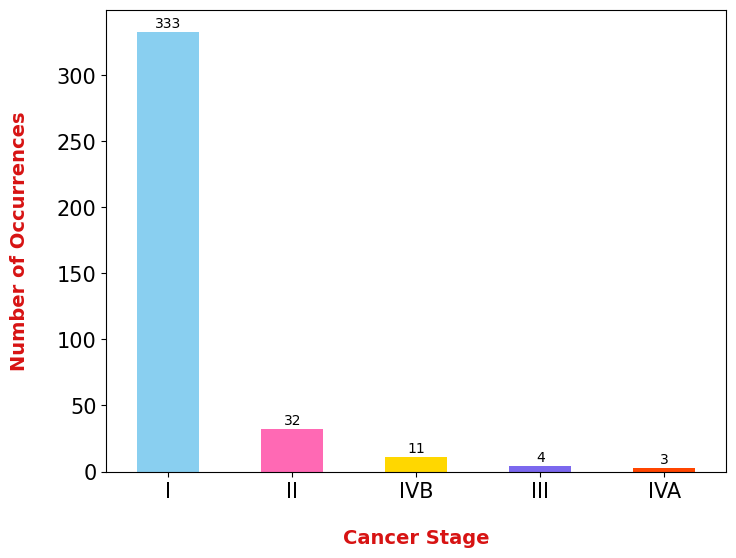

In [13]:
plt.figure(figsize = (8, 6))
ax = df["Stage"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels((df['Stage'].value_counts().index))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Cancer Stage', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

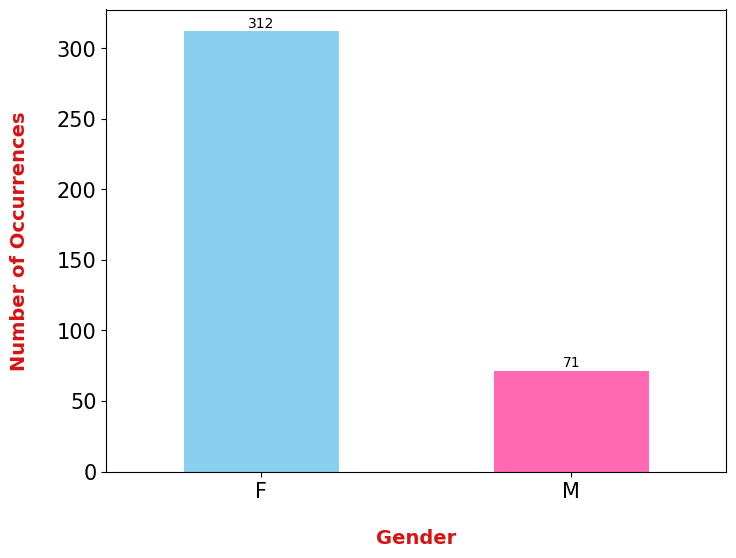

In [155]:
plt.figure(figsize = (8, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels((df['Gender'].value_counts().index))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Gender', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

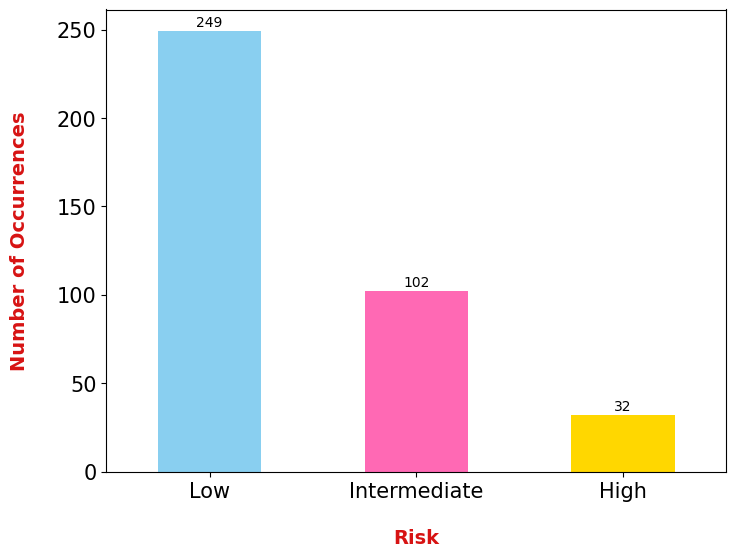

In [15]:
plt.figure(figsize = (8, 6))
ax = df["Risk"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels((df['Risk'].value_counts().index))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Risk', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

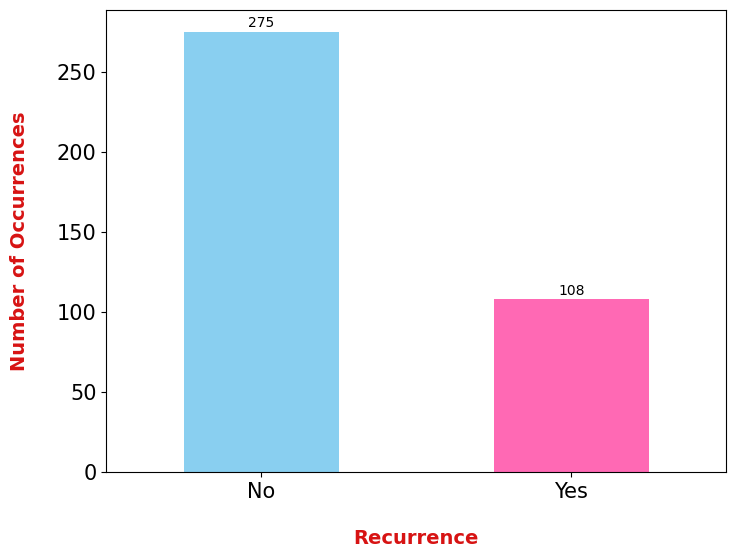

In [16]:
plt.figure(figsize = (8, 6))
ax = df["Recurred"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels((df['Recurred'].value_counts().index))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Recurrence', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

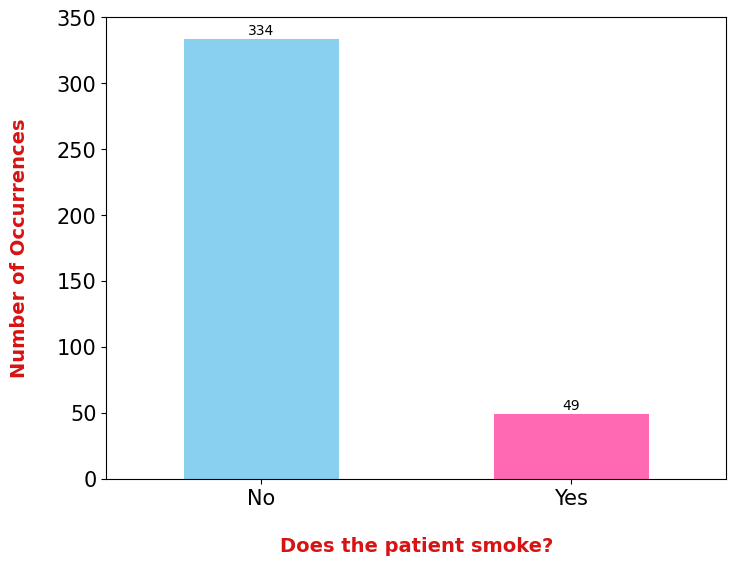

In [17]:
plt.figure(figsize = (8, 6))
ax = df["Smoking"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels((df['Smoking'].value_counts().index))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Does the patient smoke?', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

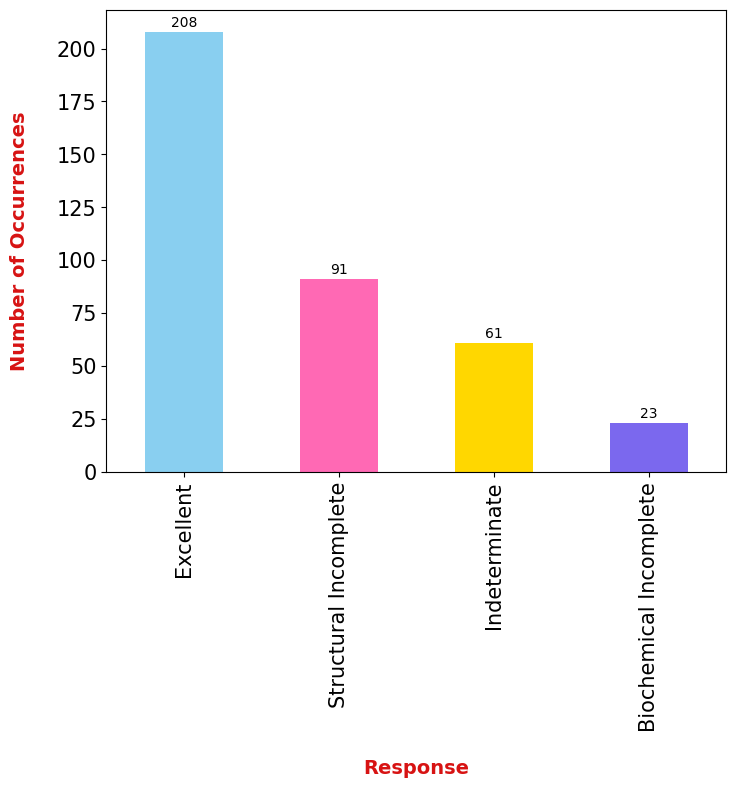

In [18]:
plt.figure(figsize = (8, 6))
ax = df["Response"].value_counts().plot(kind = 'bar', color = colors, rot = 90)
ax.set_xticklabels((df['Response'].value_counts().index))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Response', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [19]:
df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [20]:
df['Stage'].value_counts()

Stage
I      333
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64

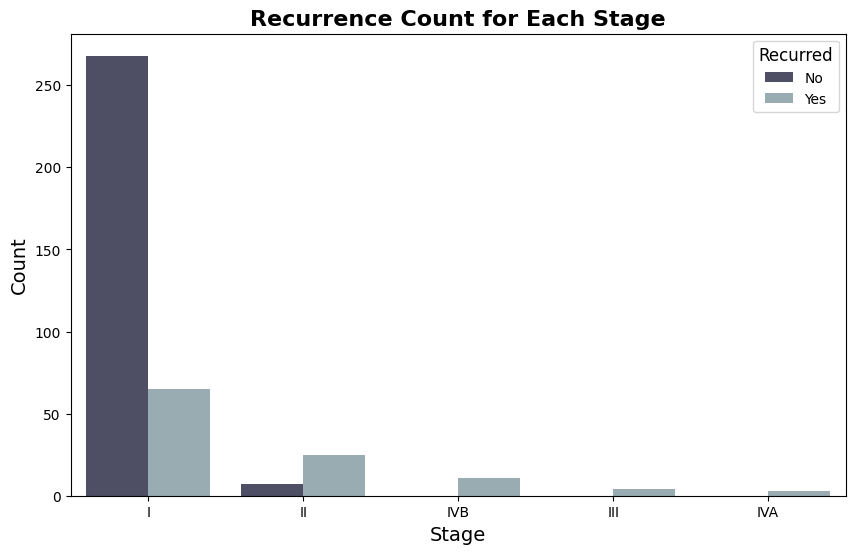

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stage', hue='Recurred', data=df, palette='bone')

plt.title('Recurrence Count for Each Stage', fontsize=16, weight='bold')
plt.xlabel('Stage', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')

plt.show()

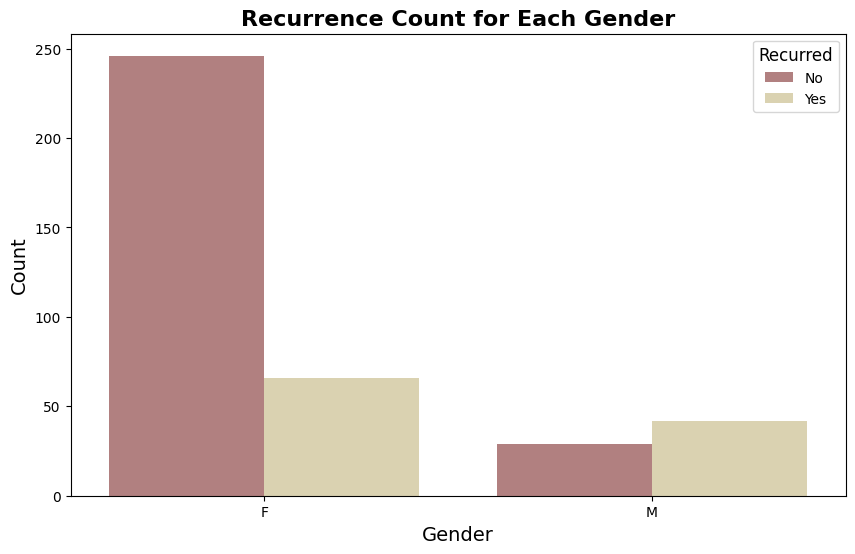

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Recurred', data=df, palette='pink')

plt.title('Recurrence Count for Each Gender', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')

plt.show()

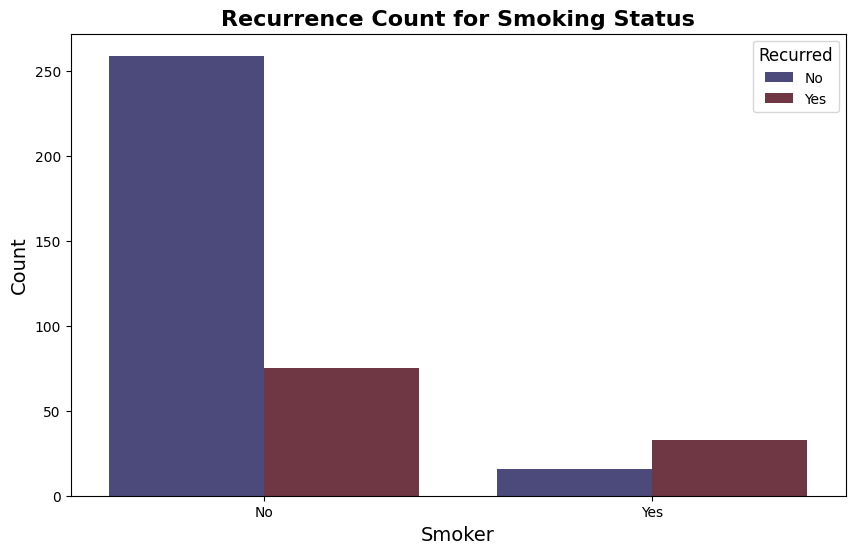

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Smoking', hue='Recurred', data=df, palette='icefire')

plt.title('Recurrence Count for Smoking Status', fontsize=16, weight='bold')
plt.xlabel('Smoker', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')

plt.show()

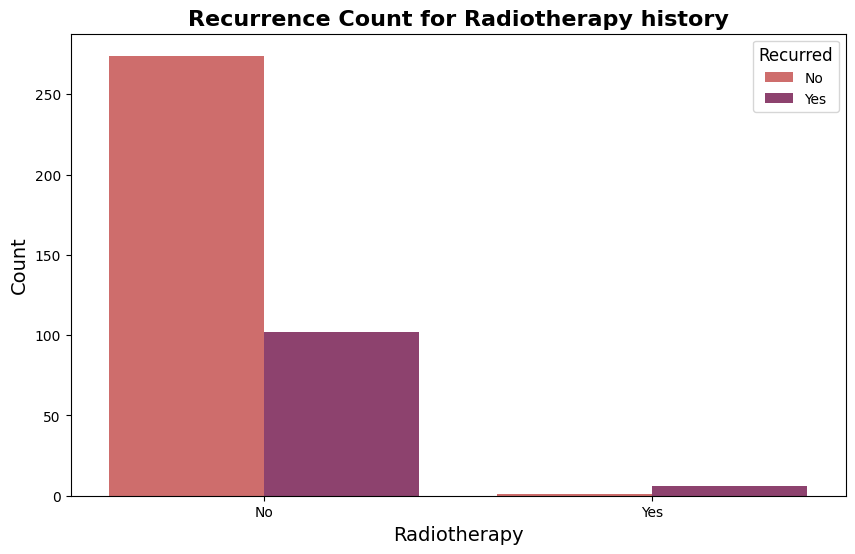

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hx Radiothreapy', hue='Recurred', data=df, palette='flare')

plt.title('Recurrence Count for Radiotherapy history', fontsize=16, weight='bold')
plt.xlabel('Radiotherapy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')

plt.show()

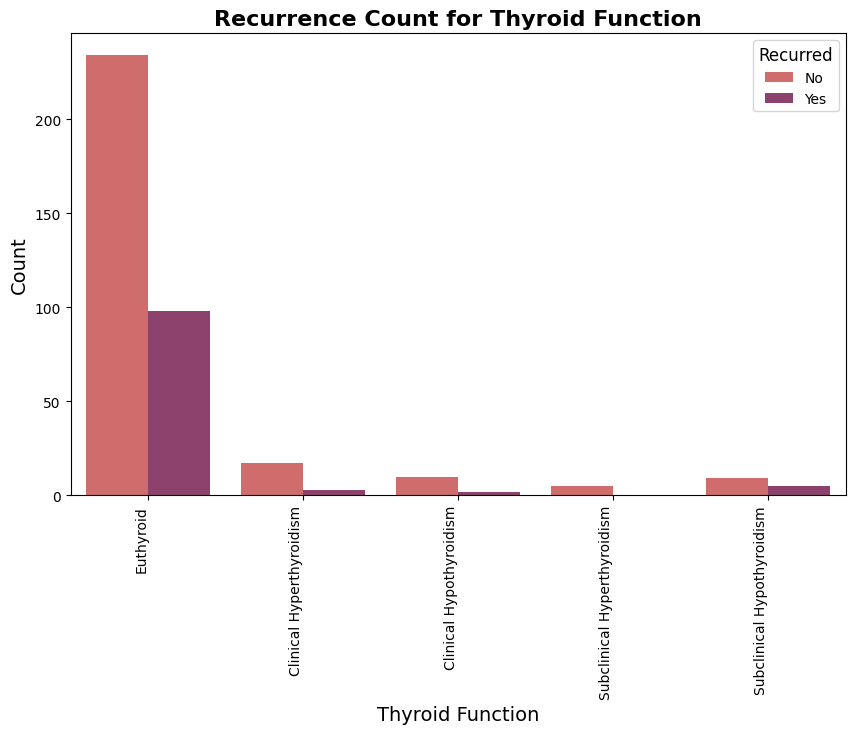

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Thyroid Function', hue='Recurred', data=df, palette='flare')

plt.title('Recurrence Count for Thyroid Function', fontsize=16, weight='bold')
plt.xlabel('Thyroid Function', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')
plt.xticks(rotation=90, ha='right')

plt.show()

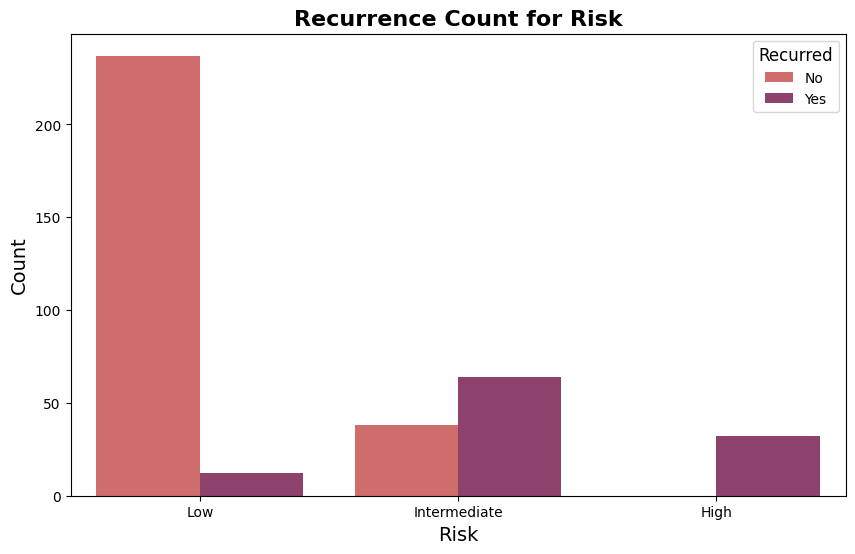

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk', hue='Recurred', data=df, palette='flare')

plt.title('Recurrence Count for Risk', fontsize=16, weight='bold')
plt.xlabel('Risk', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')

plt.show()

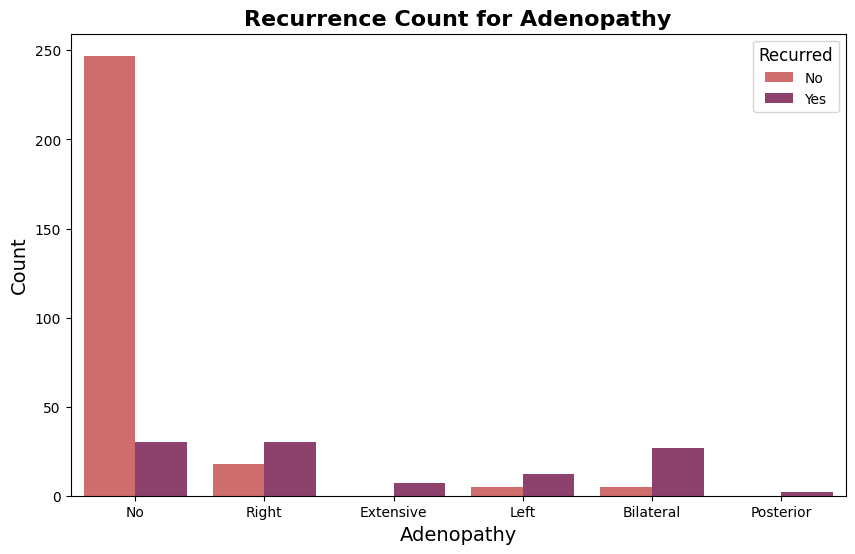

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Adenopathy', hue='Recurred', data=df, palette='flare')

plt.title('Recurrence Count for Adenopathy', fontsize=16, weight='bold')
plt.xlabel('Adenopathy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')

plt.show()

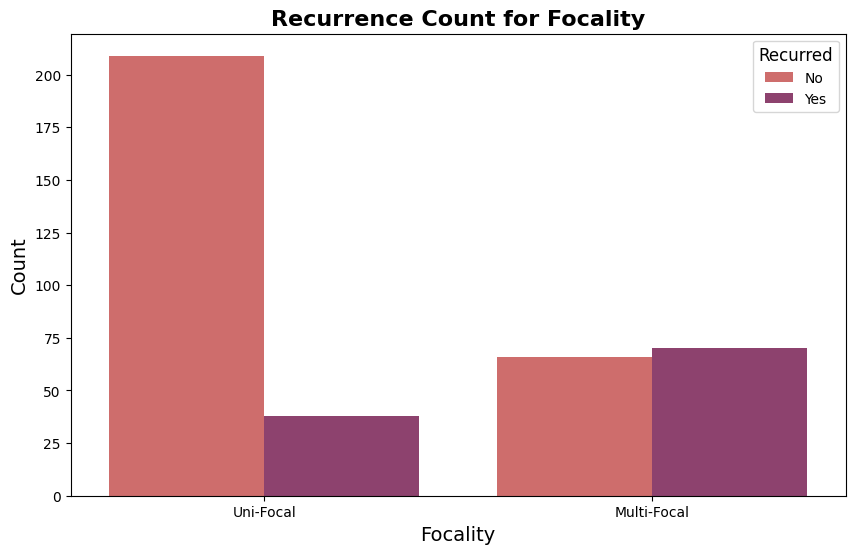

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Focality', hue='Recurred', data=df, palette='flare')

plt.title('Recurrence Count for Focality', fontsize=16, weight='bold')
plt.xlabel('Focality', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')

plt.show()

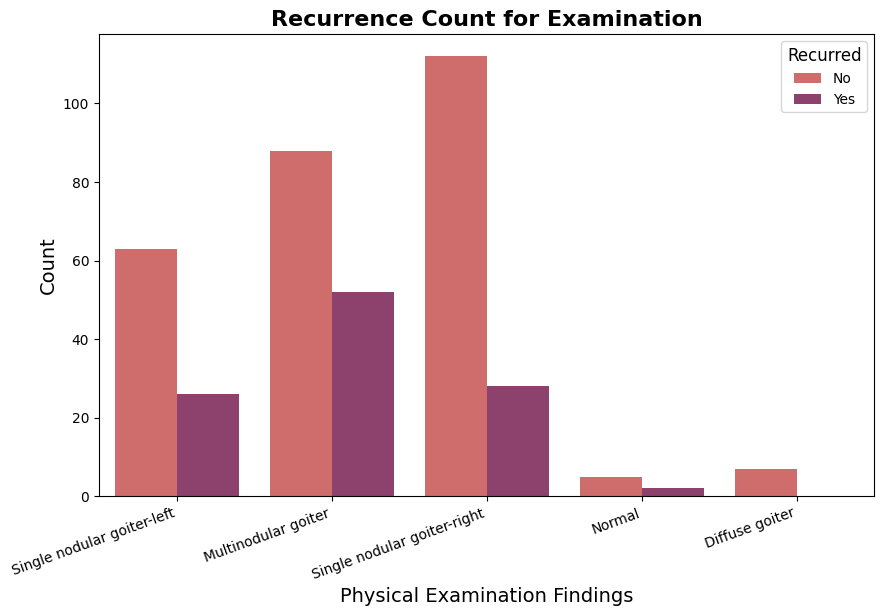

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical Examination', hue='Recurred', data=df, palette='flare')

plt.title('Recurrence Count for Examination', fontsize=16, weight='bold')
plt.xlabel('Physical Examination Findings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')
plt.xticks(rotation=20, ha='right')
plt.show()

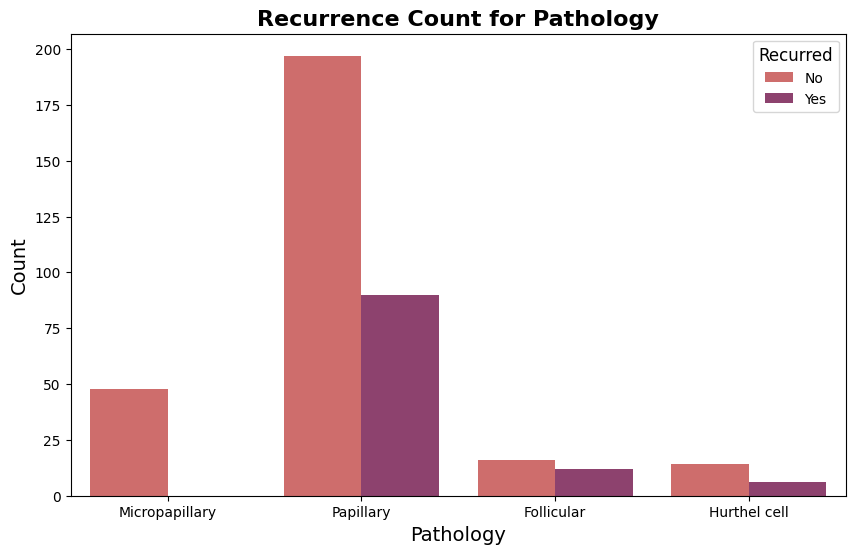

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pathology', hue='Recurred', data=df, palette='flare')

plt.title('Recurrence Count for Pathology', fontsize=16, weight='bold')
plt.xlabel('Pathology', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')

plt.show()

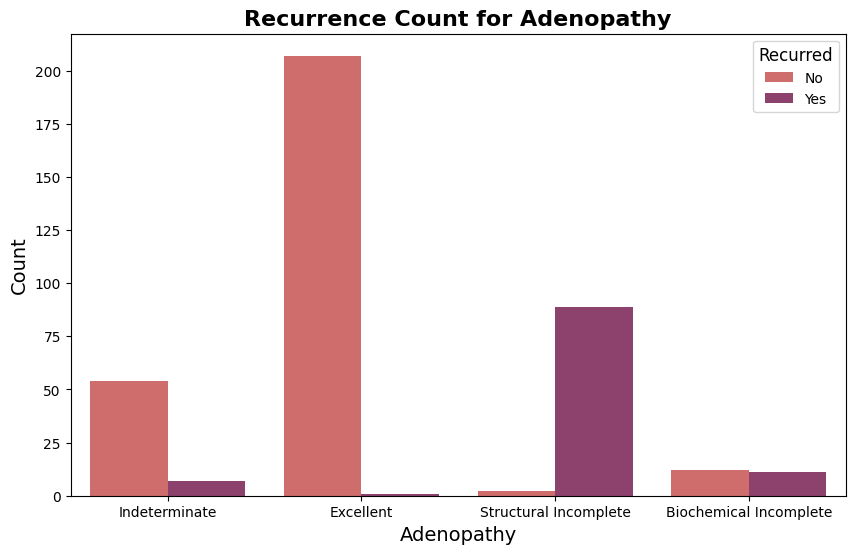

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', hue='Recurred', data=df, palette='flare')

plt.title('Recurrence Count for Adenopathy', fontsize=16, weight='bold')
plt.xlabel('Adenopathy', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Recurred', title_fontsize='12', fontsize='10')

plt.show()

# Transforming and Splitting the data

In [12]:
transformer=ColumnTransformer(transformers=[
    ('oh',OneHotEncoder(sparse=False,drop='first'), ['Gender','Thyroid Function','Physical Examination','Adenopathy','Pathology']),
    ('oe',OrdinalEncoder(categories=[['No','Yes'],['No','Yes'],['No','Yes'],['Uni-Focal','Multi-Focal'],
                                     ['Low','Intermediate','High'],['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'],
                                     ['N0','N1a','N1b'],['M0','M1'],['I', 'II', 'IVB', 'III', 'IVA'],
                                     ['Excellent', 'Indeterminate', 'Biochemical Incomplete','Structural Incomplete']]),
                                     ['Smoking','Hx Smoking','Hx Radiothreapy','Focality','Risk','T','N','M','Stage','Response'])
],
                              remainder='passthrough'
)

In [13]:
X = df.drop("Recurred",axis=1)
y = df['Recurred']

In [14]:
map = {"No": 0 , "Yes":1}
y = df['Recurred'].map(map)

In [15]:
X_transformed = transformer.fit_transform(X)

In [16]:
transformed_feature_names = transformer.get_feature_names_out(input_features=X.columns)
print(transformed_feature_names)

['oh__Gender_M' 'oh__Thyroid Function_Clinical Hypothyroidism'
 'oh__Thyroid Function_Euthyroid'
 'oh__Thyroid Function_Subclinical Hyperthyroidism'
 'oh__Thyroid Function_Subclinical Hypothyroidism'
 'oh__Physical Examination_Multinodular goiter'
 'oh__Physical Examination_Normal'
 'oh__Physical Examination_Single nodular goiter-left'
 'oh__Physical Examination_Single nodular goiter-right'
 'oh__Adenopathy_Extensive' 'oh__Adenopathy_Left' 'oh__Adenopathy_No'
 'oh__Adenopathy_Posterior' 'oh__Adenopathy_Right'
 'oh__Pathology_Hurthel cell' 'oh__Pathology_Micropapillary'
 'oh__Pathology_Papillary' 'oe__Smoking' 'oe__Hx Smoking'
 'oe__Hx Radiothreapy' 'oe__Focality' 'oe__Risk' 'oe__T' 'oe__N' 'oe__M'
 'oe__Stage' 'oe__Response' 'remainder__Age']


In [17]:
transformed_cols = ['Gender', 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Extensive', 'Adenopathy_Left', 'Adenopathy_No',
 'Adenopathy_Posterior', 'Adenopathy_Right',
 'Pathology_Hurthel cell', 'Pathology_Micropapillary',
 'Pathology_Papillary', 'Smoking', 'Hx Smoking',
 'Hx Radiothreapy', 'Focality', 'Risk', 'T', 'N', 'M',
 'Stage', 'Response', 'Age']

In [18]:
len(transformed_cols)

28

In [19]:
transformed_df = pd.DataFrame(data=X_transformed,columns=transformed_cols)
transformed_df['Recurred'] = y
transformed_df.head()

,Gender,Thyroid Function_Clinical Hypothyroidism,Thyroid Function_Euthyroid,Thyroid Function_Subclinical Hyperthyroidism,Thyroid Function_Subclinical Hypothyroidism,Physical Examination_Multinodular goiter,Physical Examination_Normal,Physical Examination_Single nodular goiter-left,Physical Examination_Single nodular goiter-right,Adenopathy_Extensive,...,Hx Radiothreapy,Focality,Risk,T,N,M,Stage,Response,Age,Recurred
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.25,random_state=1)

In [21]:
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=1)

# Model Training & Evaluation

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dt = DecisionTreeClassifier()

In [137]:
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [138]:
y_pred_dt = dt.predict(X_test_scaled)

In [139]:
evaluate_model(y_test,y_pred_dt)

Accuracy of the model is: 95.83 %
Precision of the model is: 88.24 %
Recall of the model is: 100.00 %
AUC value of the model is: 96.97 %
F1 score of the model is: 93.75 %


In [140]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.88      1.00      0.94        15

    accuracy                           0.96        48
   macro avg       0.94      0.97      0.95        48
weighted avg       0.96      0.96      0.96        48



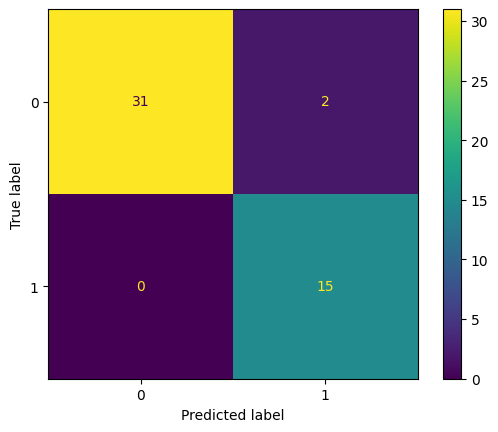

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf = RandomForestClassifier()

In [143]:
X_train_scaled.shape

(287, 28)

In [144]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [145]:
y_pred = rf.predict(X_test_scaled)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [147]:
n_estimators = [100, 300, 700, 1000]
criterion = ['gini','entropy','log_loss']
max_depth = [10,20,50,100]
bootstrap=[True,False]
grid = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, bootstrap=bootstrap) # creating dictionary to store the lists


In [148]:
GC_RF = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=5, scoring='recall_macro', error_score=0) # creating grid search object for xgb
GC_RF_result = GC_RF.fit(X_val_scaled ,y_val) # fitting the grid search on the training data

In [149]:
rf.set_params(**GC_RF_result.best_params_)

RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=10)

In [150]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=10)

In [151]:
y_pred = rf.predict(X_test_scaled)

In [152]:
evaluate_model(y_test,y_pred)

Accuracy of the model is: 97.92 %
Precision of the model is: 93.75 %
Recall of the model is: 100.00 %
AUC value of the model is: 98.48 %
F1 score of the model is: 96.77 %


In [153]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.94      1.00      0.97        15

    accuracy                           0.98        48
   macro avg       0.97      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



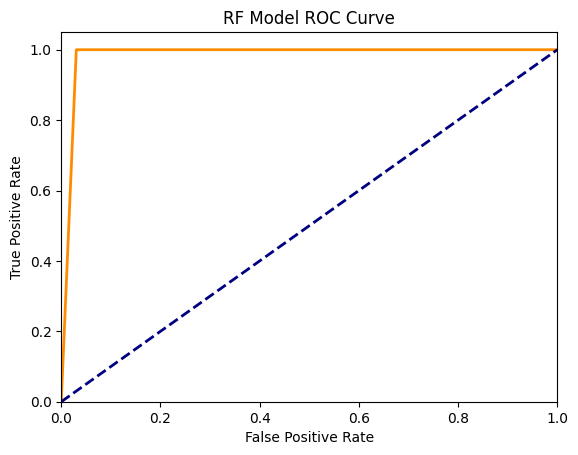

In [160]:


from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # Use y_pred[:, 1] for the positive class probabilities
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Model ROC Curve')
plt.show()

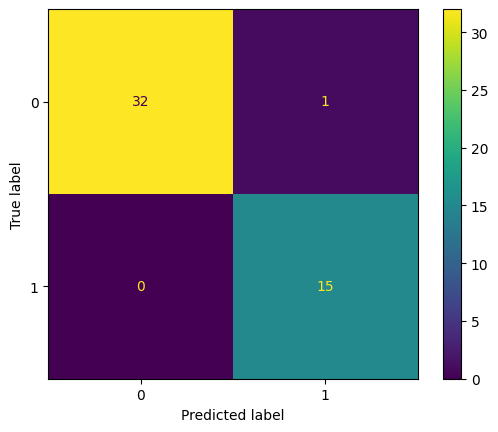

In [154]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [140]:
xgb_clsfr = XGBClassifier() #creating a model with no parameters
n_estimators = [100, 300, 500, 700,1000] # creating lists for different values of hyperparameters
subsample = [0.3,0.5, 0.7, 1.0]
max_depth = [2,4,6, 7, 9]
grid = dict(n_estimators=n_estimators, subsample=subsample, max_depth=max_depth) # creating dictionary to store the lists
grid_search = GridSearchCV(estimator=xgb_clsfr, param_grid=grid, n_jobs=-1, cv=10, scoring='roc_auc', error_score=0) # creating grid search object for xgb
grid_result = grid_search.fit(X_val_scaled, y_val) # fitting the grid search on the training data
print("Highest ROC AUC is achieved using the parameters : " , ( grid_result.best_params_))

Highest ROC AUC is achieved using the parameters :  {'max_depth': 2, 'n_estimators': 100, 'subsample': 0.3}


In [141]:
xgb_clsfr.set_params(**grid_result.best_params_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [142]:
xgb_clsfr.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [143]:
y_pred2 = xgb_clsfr.predict(X_test_scaled)

In [144]:
accuracy_score(y_test,y_pred2)

0.9583333333333334

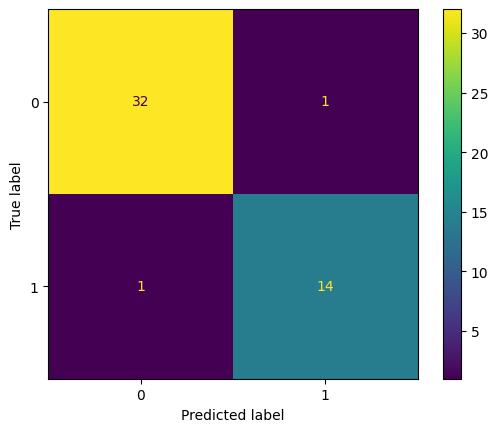

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)

In [146]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.93      0.93      0.93        15

    accuracy                           0.96        48
   macro avg       0.95      0.95      0.95        48
weighted avg       0.96      0.96      0.96        48



In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [148]:
NN_cls = Sequential([
    Dense(20, activation='relu', name='L1', kernel_regularizer=regularizers.l2(0.02)),
    Dropout(0.1),
    Dense(10, activation='relu', name='L2', kernel_regularizer=regularizers.l2(0.02)),
    Dropout(0.1),
    Dense(5, activation='relu', name='L3', kernel_regularizer=regularizers.l2(0.02)),
    Dropout(0.1),
    Dense(2, activation='linear', name='L4')
])

NN_cls.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

history_bal = NN_cls.fit(
    X_train_scaled, y_train,
    epochs=150, validation_data=(X_val_scaled, y_val))

Epoch 1/150
9/9 [==============================] - 1s 20ms/step - loss: 1.5825 - accuracy: 0.3728 - val_loss: 1.5331 - val_accuracy: 0.5208
Epoch 2/150
9/9 [==============================] - 0s 5ms/step - loss: 1.5133 - accuracy: 0.5575 - val_loss: 1.4810 - val_accuracy: 0.7292
Epoch 3/150
9/9 [==============================] - 0s 4ms/step - loss: 1.4604 - accuracy: 0.7317 - val_loss: 1.4350 - val_accuracy: 0.7292
Epoch 4/150
9/9 [==============================] - 0s 5ms/step - loss: 1.4130 - accuracy: 0.7456 - val_loss: 1.3929 - val_accuracy: 0.6875
Epoch 5/150
9/9 [==============================] - 0s 4ms/step - loss: 1.3740 - accuracy: 0.7247 - val_loss: 1.3528 - val_accuracy: 0.7917
Epoch 6/150
9/9 [==============================] - 0s 4ms/step - loss: 1.3237 - accuracy: 0.8258 - val_loss: 1.3147 - val_accuracy: 0.7500
Epoch 7/150
9/9 [==============================] - 0s 4ms/step - loss: 1.2858 - accuracy: 0.7909 - val_loss: 1.2777 - val_accuracy: 0.7083
Epoch 8/150
9/9 [=========

In [149]:
predictions=NN_cls.predict(X_test_scaled)

2/2 [==============================] - 0s 2ms/step


In [150]:
y_pred = np.argmax(NN_cls.predict(X_test_scaled), axis=1)

2/2 [==============================] - 0s 2ms/step


In [151]:
evaluate_model(y_test,y_pred)

Accuracy of the model is: 97.92 %
Precision of the model is: 100.00 %
Recall of the model is: 93.33 %
AUC value of the model is: 96.67 %
F1 score of the model is: 96.55 %


In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.93      0.97        15

    accuracy                           0.98        48
   macro avg       0.99      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



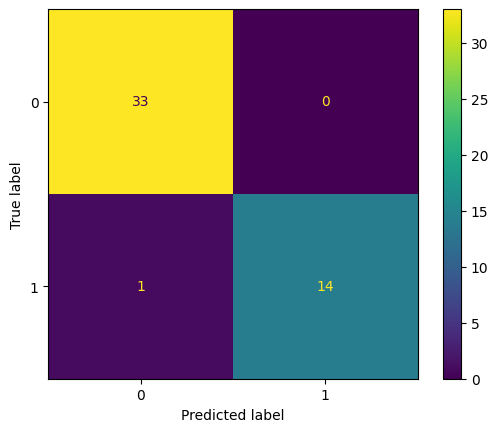

In [153]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [85]:
n_splits = 5
# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

avg = []

# Iterate over folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_transformed = transformer.fit_transform(X_train)
    X_test_transformed = transformer.transform(X_test)
    X_train_scaled = scaler.fit_transform(X_train_transformed)
    X_test_scaled = scaler.transform(X_test_transformed)

    # Your training and evaluation steps for this fold
    rf.fit(X_train_scaled, y_train)
    preds = rf.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    avg.append(acc)
    
    print(f"Fold {fold + 1}: Accuracy score: {acc:.2f}")

print(f"Average accuracy score : {sum(avg)/len(avg):.2f}")


Fold 1: Accuracy score: 0.99
Fold 2: Accuracy score: 0.97
Fold 3: Accuracy score: 0.97
Fold 4: Accuracy score: 0.97
Fold 5: Accuracy score: 0.95
Average accuracy score : 0.97


In [86]:
# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

avg = []

# Iterate over folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_transformed = transformer.fit_transform(X_train)
    X_test_transformed = transformer.transform(X_test)
    X_train_scaled = scaler.fit_transform(X_train_transformed)
    X_test_scaled = scaler.transform(X_test_transformed)

    # Your training and evaluation steps for this fold
    xgb_clsfr.fit(X_train_scaled, y_train)
    preds = xgb_clsfr.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    avg.append(acc)
    
    print(f"Fold {fold + 1}: Accuracy score: {acc:.2f}")

print(f"Average accuracy score : {sum(avg)/len(avg):.2f}")


Fold 1: Accuracy score: 1.00
Fold 2: Accuracy score: 0.94
Fold 3: Accuracy score: 0.96
Fold 4: Accuracy score: 0.97
Fold 5: Accuracy score: 0.96
Average accuracy score : 0.97


In [204]:
n_splits = 5
# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

avg = []

# Iterate over folds
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_transformed = transformer.fit_transform(X_train)
    X_test_transformed = transformer.transform(X_test)
    X_train_scaled = scaler.fit_transform(X_train_transformed)
    X_test_scaled = scaler.transform(X_test_transformed)

    # Your training and evaluation steps for this fold
    NN_cls.fit(X_train_scaled, y_train,epochs=150,verbose=0)
    preds = np.argmax(NN_cls.predict(X_test_scaled),axis=1)
    acc = accuracy_score(y_test, preds)
    avg.append(acc)
    
    print(f"Fold {fold + 1}: Accuracy score: {acc:.2f}")

print(f"Average accuracy score : {sum(avg)/len(avg):.2f}")


3/3 [==============================] - 0s 2ms/step
Fold 1: Accuracy score: 0.99
3/3 [==============================] - 0s 2ms/step
Fold 2: Accuracy score: 0.95
3/3 [==============================] - 0s 2ms/step
Fold 3: Accuracy score: 0.97
3/3 [==============================] - 0s 2ms/step
Fold 4: Accuracy score: 0.96
3/3 [==============================] - 0s 2ms/step
Fold 5: Accuracy score: 0.95
Average accuracy score : 0.96


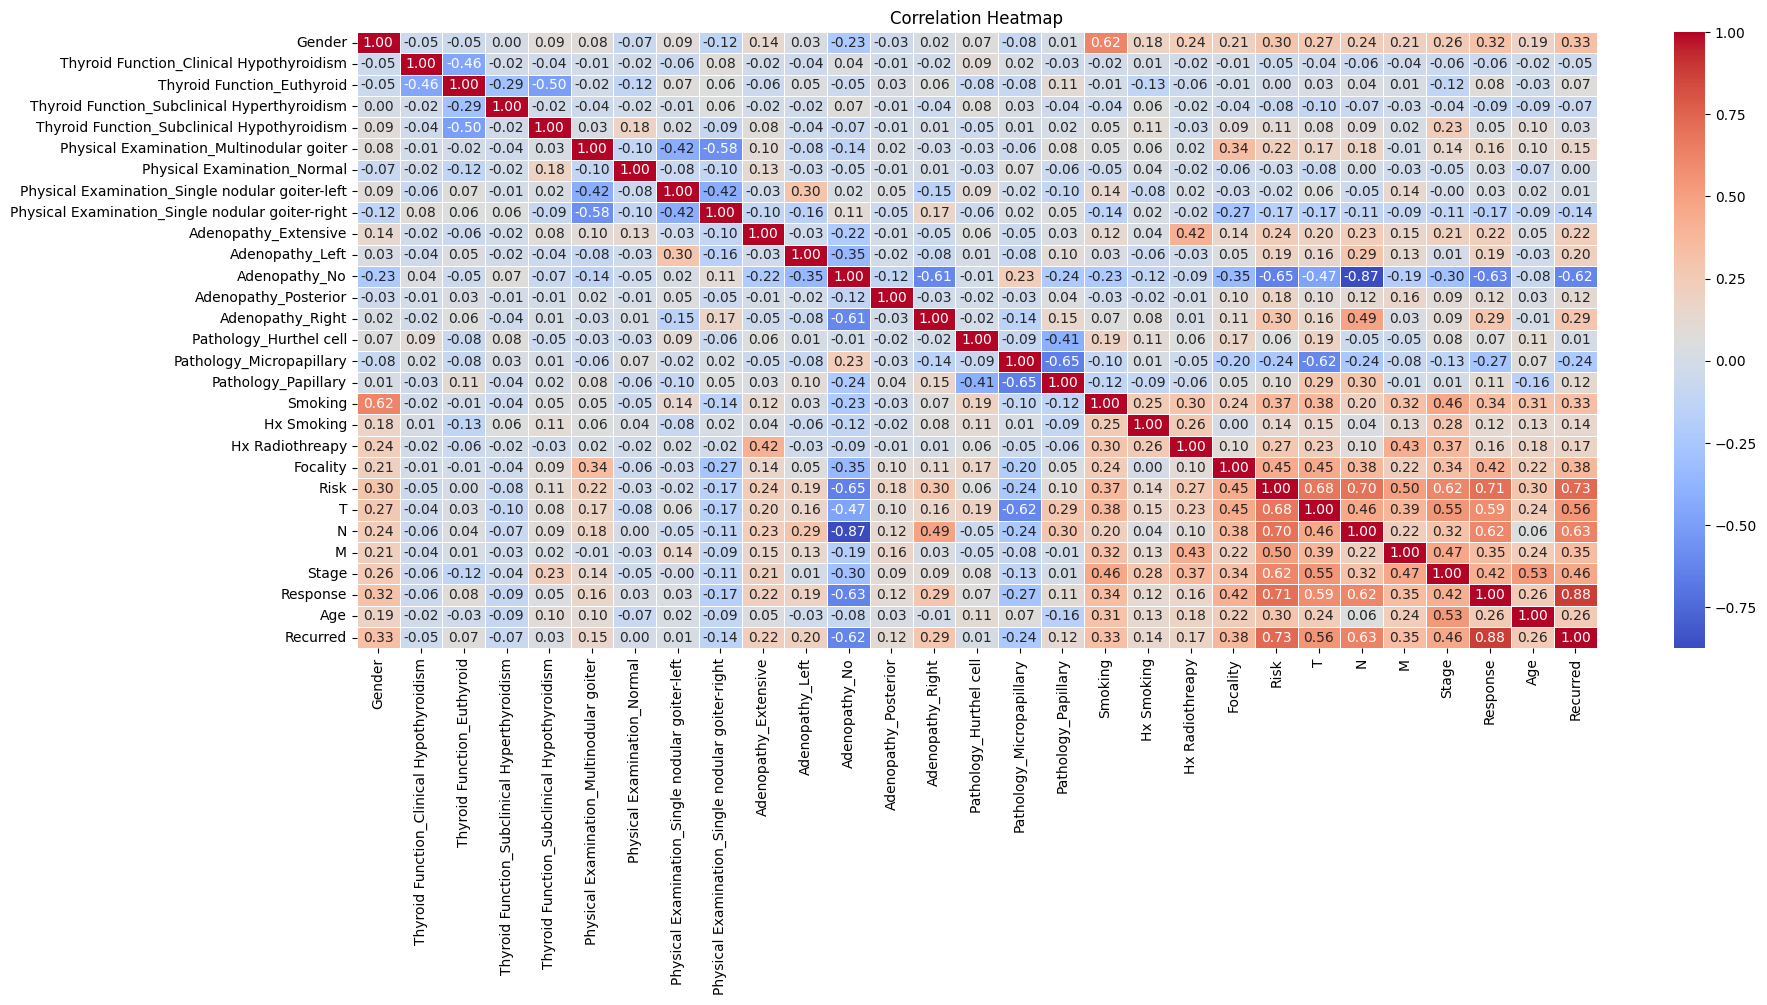

In [87]:
corr_matrix = transformed_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [88]:
def find_correlated_pairs(data, threshold):
    correlation_matrix = data.corr()

    # Set the correlation threshold
    threshold = threshold  # Adjust this threshold as needed

    # Find feature pairs with correlation above the threshold
    highly_correlated_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
                highly_correlated_pairs.append(pair)

    # Create a dictionary to store correlated features for each unique feature
    correlated_features_dict = {}
    for pair in highly_correlated_pairs:
        if pair[0] not in correlated_features_dict:
            correlated_features_dict[pair[0]] = [pair[1]]
        else:
            correlated_features_dict[pair[0]].append(pair[1])

        if pair[1] not in correlated_features_dict:
            correlated_features_dict[pair[1]] = [pair[0]]
        else:
            correlated_features_dict[pair[1]].append(pair[0])

    # Display correlated features for each unique feature
    for feature, correlated_features in correlated_features_dict.items():
        print(f"{feature} is strongly correlated to \033[1m{len(correlated_features)}\033[0m feature(s): {', '.join(correlated_features)}")

    return highly_correlated_pairs,correlated_features_dict


In [89]:
find_correlated_pairs(transformed_df,0.7)

Adenopathy_No is strongly correlated to 1 feature(s): N
N is strongly correlated to 1 feature(s): Adenopathy_No
Risk is strongly correlated to 2 feature(s): Response, Recurred
Response is strongly correlated to 2 feature(s): Risk, Recurred
Recurred is strongly correlated to 2 feature(s): Risk, Response


([('Adenopathy_No', 'N', -0.8749861839962545),
  ('Risk', 'Response', 0.7053535195044758),
  ('Risk', 'Recurred', 0.7333758705566537),
  ('Response', 'Recurred', 0.879182303414948)],
 {'Adenopathy_No': ['N'],
  'N': ['Adenopathy_No'],
  'Risk': ['Response', 'Recurred'],
  'Response': ['Risk', 'Recurred'],
  'Recurred': ['Risk', 'Response']})

# Feature Importance & SHAP Plots

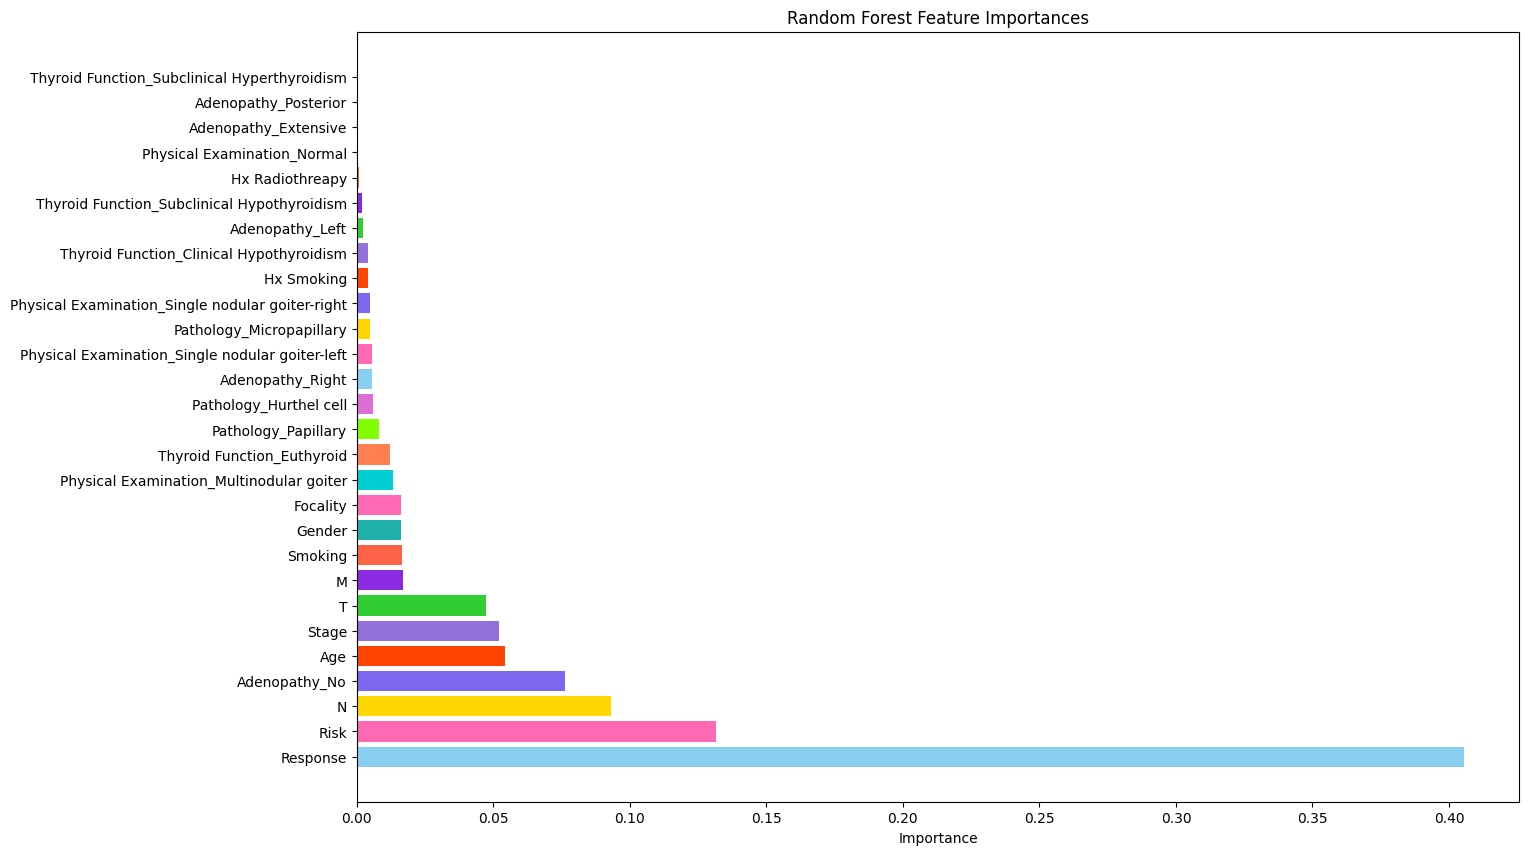

In [91]:

# Extract feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
features_df = pd.DataFrame({'Feature': transformed_df.drop('Recurred',axis=1).columns, 'Importance': feature_importances})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

custom_colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'gray']

# Plot the feature importances
plt.figure(figsize=(15, 10))
plt.barh(features_df['Feature'], features_df['Importance'],color=colors)
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

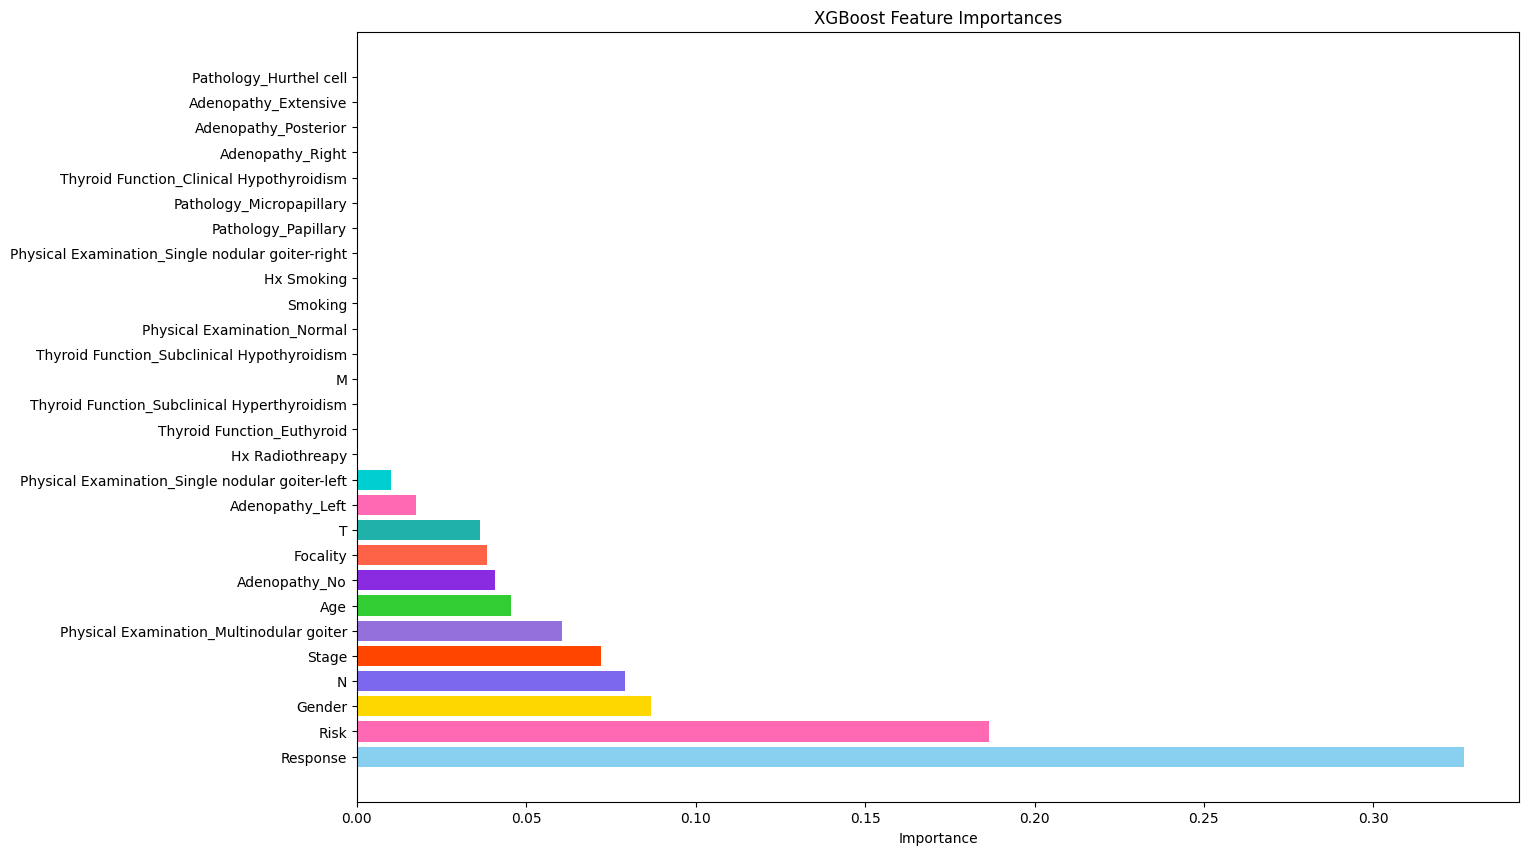

In [92]:

# Extract feature importances
feature_importances = xgb_clsfr.feature_importances_

# Create a DataFrame with feature names and importances
features_df = pd.DataFrame({'Feature': transformed_df.drop('Recurred',axis=1).columns, 'Importance': feature_importances})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(15, 10))
plt.barh(features_df['Feature'], features_df['Importance'],color=colors)
plt.xlabel('Importance')
plt.title('XGBoost Feature Importances')
plt.show()

In [93]:
corr = transformed_df.corr()['Recurred'].abs().sort_values(ascending=False)

corr.values


array([1.        , 0.8791823 , 0.73337587, 0.63232348, 0.62396471,
       0.55620108, 0.46356336, 0.38377628, 0.35435967, 0.33324262,
       0.32818915, 0.28855773, 0.25889701, 0.23721587, 0.21772564,
       0.20303264, 0.17440672, 0.15088074, 0.13829686, 0.13607335,
       0.12144371, 0.11561308, 0.07482722, 0.072075  , 0.04609142,
       0.03253491, 0.01241164, 0.00939794, 0.00113104])

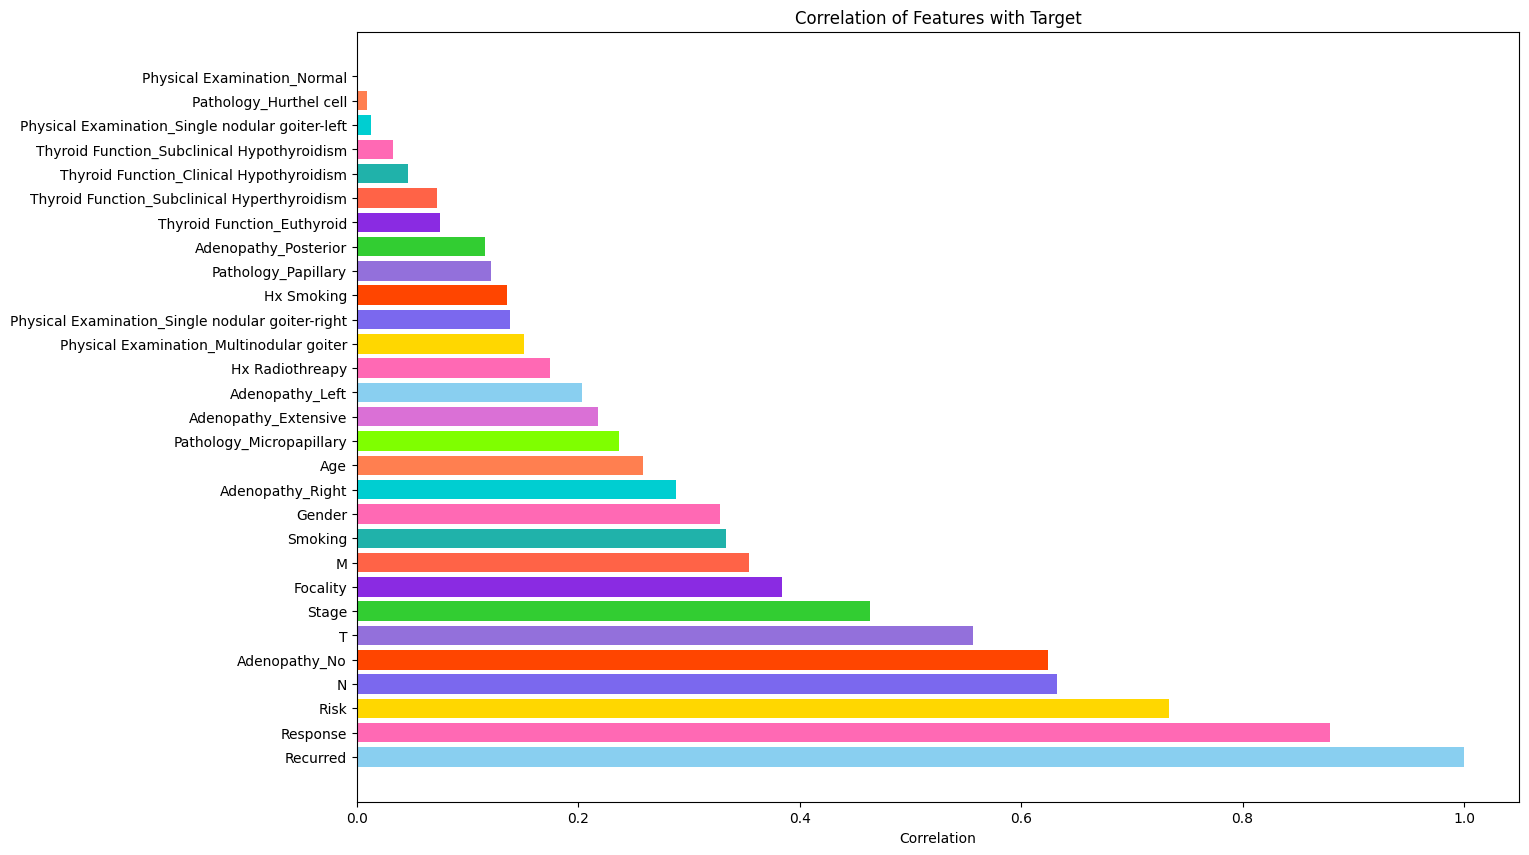

In [94]:
correlation_df = pd.DataFrame({'Feature': corr.index, 'Correlation with Target': corr.values})


# Plot the feature importances
plt.figure(figsize=(15, 10))
plt.barh(correlation_df['Feature'], correlation_df['Correlation with Target'],color=colors)
plt.xlabel('Correlation')
plt.title('Correlation of Features with Target')
plt.show()

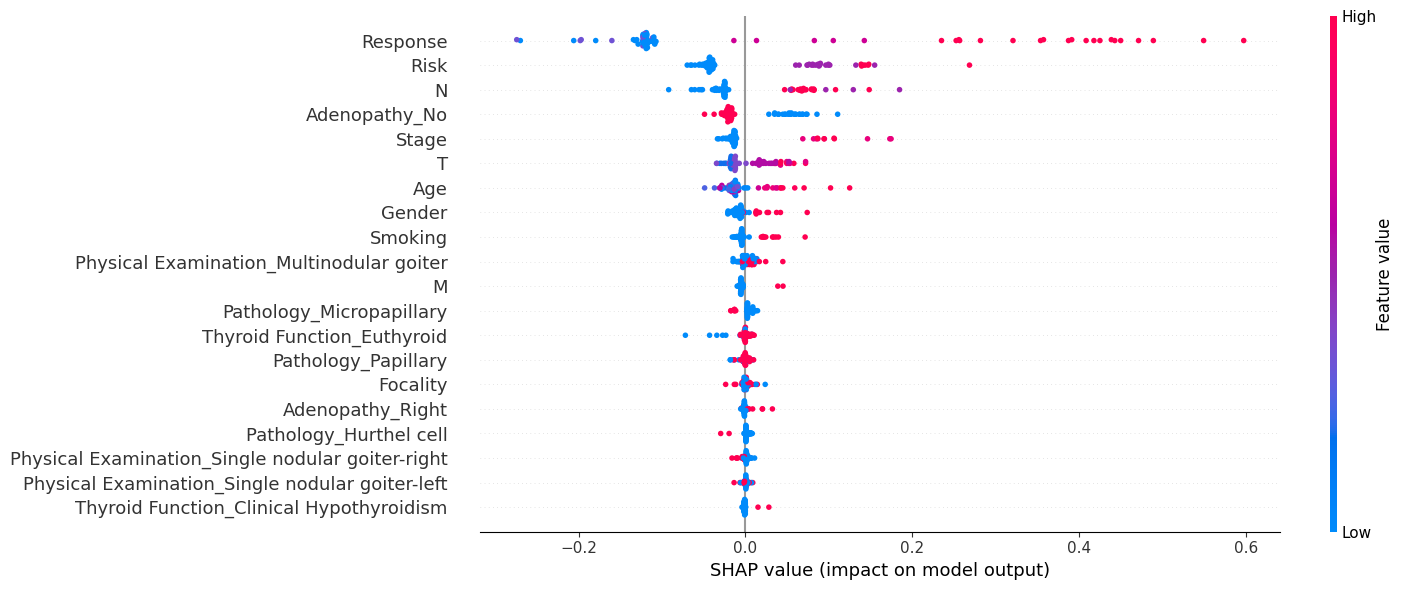

In [95]:
import shap

explainer = shap.TreeExplainer(rf)


shap_values = explainer.shap_values(X_test_scaled)


feature_names = transformed_df.drop('Recurred',axis=1).columns


shap.summary_plot(shap_values[1], X_test_scaled, feature_names=feature_names,show=False, plot_size=(15, 6))




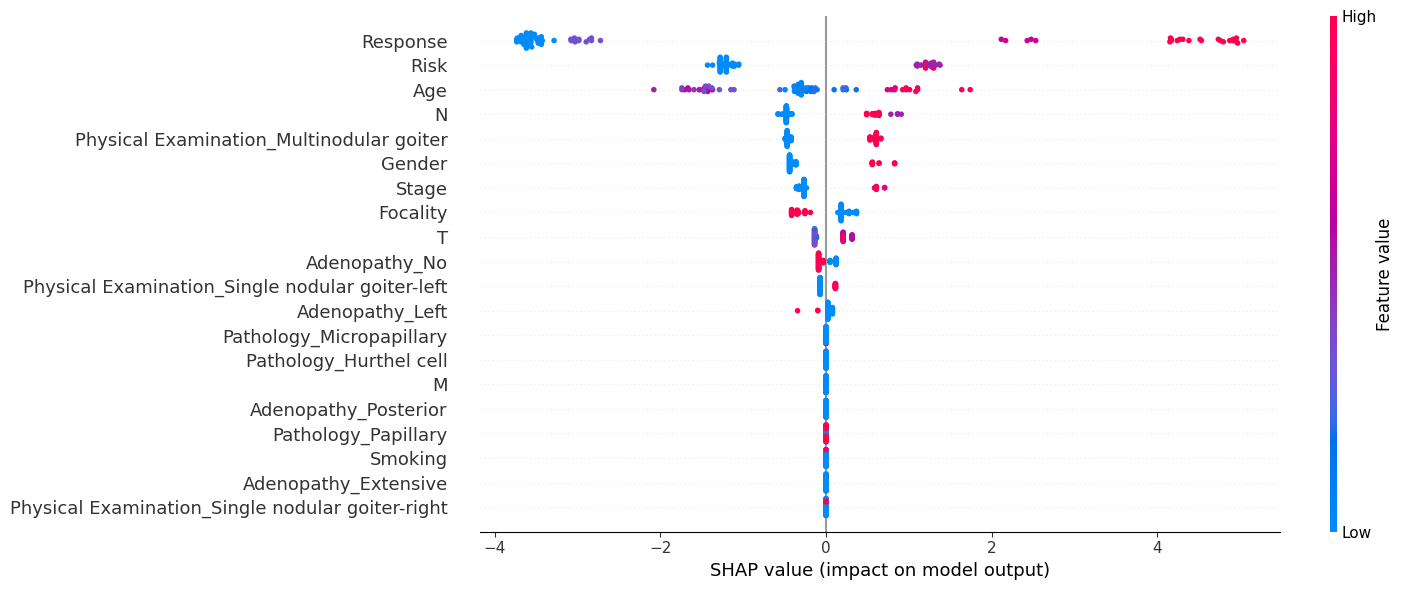

In [96]:
explainer = shap.TreeExplainer(xgb_clsfr)


shap_values = explainer.shap_values(X_test_scaled)


feature_names = transformed_df.drop('Recurred',axis=1).columns


shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names, show=False, plot_size=(15, 6))

# Pipelines & Model Pickle Files

In [98]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('estimator', rf)

])

In [161]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 RandomForestClassifier(bootstrap=False, max_depth=10))])

In [162]:
preds = pipe.predict(X_test)

In [166]:
pickle.dump(transformer,open('models/transformer.pkl','wb'))
pickle.dump(pipe,open('models/pipe.pkl','wb'))

In [176]:
X.iloc[0].values.shape

(16,)

In [170]:
arr = [27, 'F', 'No', 'No', 'No', 'Euthyroid',
       'Single nodular goiter-left', 'No', 'Micropapillary', 'Uni-Focal',
       'Low', 'T1a', 'N0', 'M0', 'I', 'Indeterminate']

In [180]:
arr = np.array(arr,dtype=object).reshape(1,-1)

In [200]:
test = pd.DataFrame(data=arr,columns=X.columns)

In [179]:
X.columns.shape

(16,)

In [195]:
X.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'],
      dtype='object')

In [196]:
import json

column_names = X.columns.tolist()

# Save column names to a JSON file
with open('column_names.json', 'w') as json_file:
    json.dump(column_names, json_file)

In [197]:
with open ('column_names.json','r') as json_file:
    column_names = json.load(json_file)


In [198]:
column_names

['Age',
 'Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [199]:
transformer_1 = pickle.load(open("models/transformer.pkl","rb"))
pipeline = pickle.load(open("models/pipe.pkl","rb"))

In [201]:
test = transformer_1.transform(test)

In [205]:
X_test[0]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
        0., 55.])

In [207]:
df['Response'].value_counts()

Response
Excellent                 208
Structural Incomplete      91
Indeterminate              61
Biochemical Incomplete     23
Name: count, dtype: int64